In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
simulation_folder_In = 'Simulation_data\Input'
simulation_folder_Out = 'Simulation_data\Output'


def load_data_asc(Folder,file_name):
    file_path = os.path.join(Folder,file_name)
    f = open(file_path, "r")
    ncols = int(f.readline().split()[1])
    nrows = int(f.readline().split()[1])
    xllcorner = float(f.readline().split()[1])
    yllcorner=  float(f.readline().split()[1] )
    cellsize = float(f.readline().split()[1])
    NODATA_value = float(f.readline().split()[1])
    data=np.reshape(np.array([float(i) for i in f.read().split()]),(nrows,ncols))
    return data

def load_data_xyz(Folder,file_name):
    file_path = os.path.join(Folder,file_name)
    f = open(file_path, "r")
    ncols, nrows = map(int,f.readline().split())
    a = np.array([float(i) for i in f.readline().split()])
    b = np.array([float(i) for i in f.readline().split()])
    data = np.reshape(np.array([float(i) for i in f.read().split()]),(nrows,ncols))
    
    return a,b,data

def rel_to_point(release_area):
    nrows, ncol = release_area.shape
    rows_all = np.array([])
    col_all = np.array([])
    z_all = np.array([])
    for i in range(nrows):
        for j in range(ncol):
            if release_area[i][j]>0:
                rows_all = np.append(rows_all,i)
                col_all = np.append(col_all,j)
                z_all = np.append(z_all,release_area[i][j])
    return rows_all,col_all,z_all

file_name='YT_HK5M_Clip_rel.rel'
file_path = os.path.join(simulation_folder_In,file_name)
f = open(file_path, "r")
info=np.array([float(i) for i in f.read().split()])
release_area = np.reshape(info[1:],(int(info[0]),2))

asc = load_data_asc(simulation_folder_In,'YT_HK5m_clip.asc')
a,b,xyz= load_data_xyz(simulation_folder_In,'YT_HK5m_clip.xyz')
xyz=np.flipud(xyz)

file_name='YT_HK5m_hazardmap.asc'
file_path = os.path.join(simulation_folder_Out,file_name)
f = open(file_path, "r")
hazard_map = np.reshape(np.array([float(i) for i in f.read().split()]),(15214,3))
x=hazard_map[:,0][hazard_map[:,2]>0]
y=hazard_map[:,1][hazard_map[:,2]>0]
risk=hazard_map[:,2][hazard_map[:,2]>0]

file_name='YT_HK5m_maxheight.asc'
file_path = os.path.join(simulation_folder_Out,file_name)
f = open(file_path, "r")
max_height = np.array([float(i) for i in f.read().split()])
max_height_map=max_height[hazard_map[:,2]>0]

file_name='YT_HK5m_maxvelocity.asc'
file_path = os.path.join(simulation_folder_Out,file_name)
f = open(file_path, "r")
max_velocity = np.array([float(i) for i in f.read().split()])
max_velocity_map=max_velocity[hazard_map[:,2]>0]



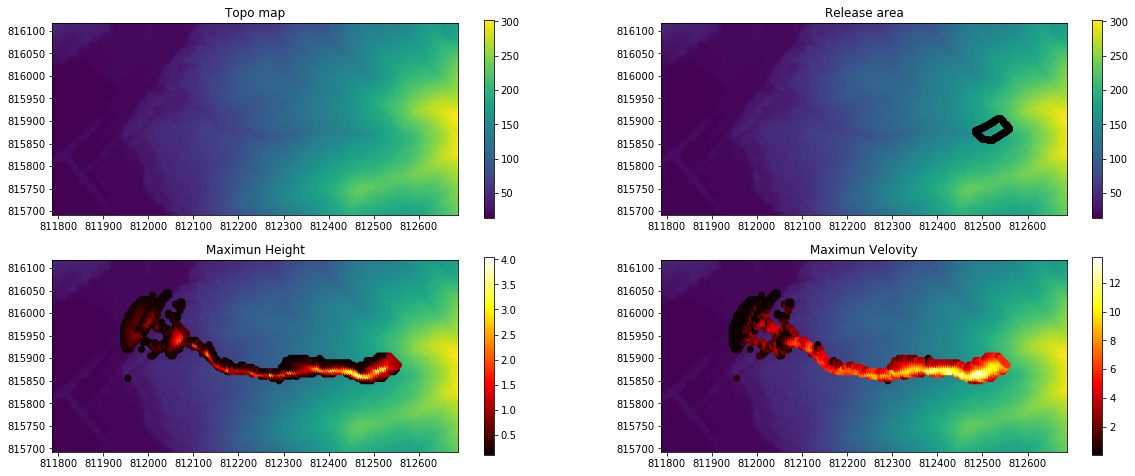

In [3]:
fig, axes = plt.subplots(2,2,figsize=(20,8))

img = axes[0,0].imshow(xyz, extent=[a[0],a[-1],b[1],b[-1]])
axes[0,0].set_title('Topo map')
plt.colorbar(img,ax=axes[0,0])

axes[0,1].imshow(xyz, extent=[a[0],a[-1],b[1],b[-1]])
axes[0,1].scatter(release_area[:,0],release_area[:,1],c='black')
axes[0,1].set_title('Release area')
plt.colorbar(img,ax=axes[0,1])

height = axes[1,0].scatter(x,y,c=max_height_map, cmap='hot')
axes[1,0].imshow(xyz, extent=[a[0],a[-1],b[1],b[-1]])
axes[1,0].set_title('Maximun Height')
plt.colorbar(height,ax=axes[1,0])


velocity = axes[1,1].scatter(x,y,c=max_velocity_map, cmap='hot')
axes[1,1].imshow(xyz, extent=[a[0],a[-1],b[1],b[-1]])
axes[1,1].set_title('Maximun Velovity')
plt.colorbar(velocity,ax=axes[1,1])
